In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as prp
import statsmodels.api as sm

In [32]:
df=pd.read_csv("D:\Open IIT DATA\Open-IIT-Data-analytics\Question_datasets\Train_data.csv") #reading test data
df.head(10) 

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.92700,5,0.5130,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.08840,4,0.1510,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.00000,0,0.4010,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.10800,7,0.2180,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.00000,5,0.3220,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average
5,14384,0.898,0.498,0.4420,No,0.00319,10,0.0974,-9.481,Major,01-01-1968,0.0337,109.619,0.3550,1968,2.6,low
6,954,0.259,0.620,0.7580,No,0.00132,5,0.4160,-8.183,Major,13-11-1942,0.0343,119.258,0.9120,1942,2.4,very low
7,5930,0.124,0.879,0.6280,Yes,0.00000,1,0.0661,-6.668,Minor,01-01-2005,0.2640,150.105,0.7210,2005,3.5,average
8,11900,0.149,0.697,0.1840,Yes,0.00000,2,0.0763,-23.303,Minor,01-01-1945,0.9330,133.997,0.6130,1945,1.6,very low
9,14498,0.470,0.587,0.5660,No,0.00000,9,0.0644,-9.932,Major,01-01-1999,0.0276,76.054,0.5290,1999,7.7,high


In [102]:
df["release_date"]=pd.to_datetime(df["release_date"]) #converting str to timestamp

In [103]:
#creating new columns with encoded categorical features (mode,explicit)
le1=prp.LabelEncoder()
le2=prp.LabelEncoder()
le1.fit(df["explicit"])
le2.fit(df["mode"])
df["explicit_coded"]=le1.transform(df["explicit"])
df["mode_coded"]=le2.transform(df["mode"])

In [104]:
#encoding the target variable (popularity)

def encoder(row): # function to encode popularity
    if row["popularity"]=="very low":
        return 1
    if row["popularity"]=="low":
        return 2
    if row["popularity"]=="average":
        return 3
    if row["popularity"]=="high":
        return 4
    if row["popularity"]=="very high":
        return 5

df["popularity_code"]=df.apply(lambda row : encoder(row),axis=1) #creating new column for coded popularity

In [108]:
#calculating covariences
covar=list()
for i in df.columns:
    filt=i=="explicit" or i=="release_date" or i=="mode" or i=="popularity" or i=="popularity_code" or i=="id" or i=='Day' or i=='Num_days'
    if not filt :
        covar.append(df[i].cov(df["popularity_code"]))
colms=list()
for i in df.columns:
    filt=i=="explicit" or i=="release_date" or i=="mode" or i=="popularity" or i=="popularity_code" or i=="id" or i=='Day'or i=='Num_days'
    if not filt :
        colms.append(i)
covariences = pd.DataFrame({'Features':colms,'Covarience_wrt_popularity':covar}) # covarience dataframe

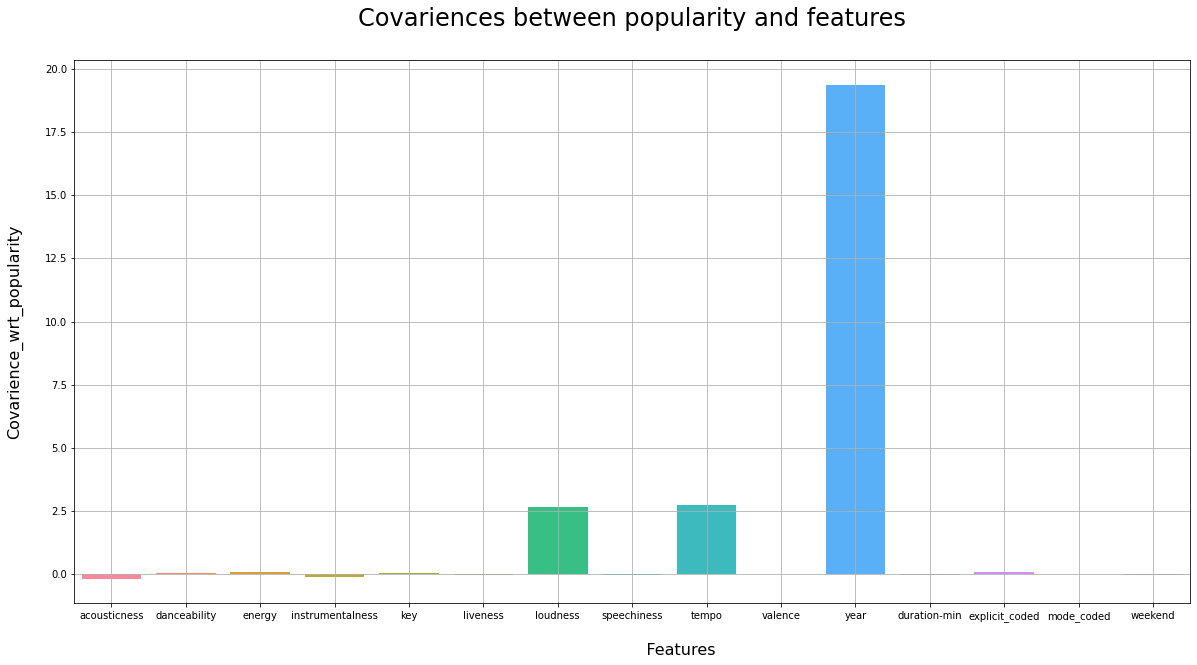

In [109]:
#plotting covariences
fg,axs=plt.subplots(figsize=(20,10))
sns.barplot(ax=axs,x='Features',y='Covarience_wrt_popularity',data=covariences,saturation=1)
axs.set_xlabel('''
                   Features''' , size=16)
axs.set_ylabel('''Covarience_wrt_popularity
                                           ''', size=16)
axs.set_title('''Covariences between popularity and features
                                                             ''',size=24)
plt.grid(True)
plt.savefig("D:\Open IIT DATA\Open-IIT-Data-analytics\Diagrams\covariences.png") #saving the file

In [111]:
#calculating pearson corelation coefficient
correl=list()
for i in df.columns:
    filt=i=="explicit" or i=="release_date" or i=="mode" or i=="popularity" or i=="popularity_code" or i=="id"or i=='Day' 
    if not filt :
        correl.append(df[i].corr(df["popularity_code"]))
colms=list()
for i in df.columns:
    filt=i=="explicit" or i=="release_date" or i=="mode" or i=="popularity" or i=="popularity_code" or i=="id"or i=='Day'
    if not filt :
        colms.append(i)
corelation = pd.DataFrame({'Features':colms,'Corelations_wrt_popularity':correl}) # corelation dataframe

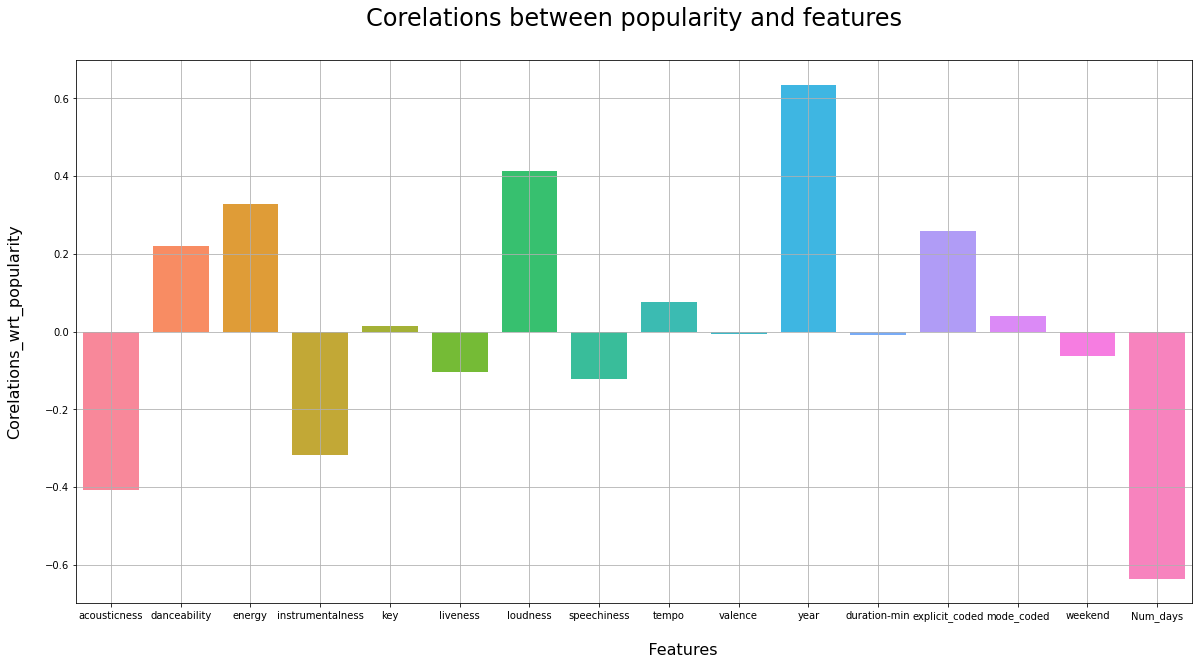

In [112]:
#plotting corelations
fg,axs=plt.subplots(figsize=(20,10))
sns.barplot(ax=axs,x='Features',y='Corelations_wrt_popularity',data=corelation,saturation=1)
axs.set_xlabel('''
                   Features''' , size=16)
axs.set_ylabel('''Corelations_wrt_popularity
                                           ''', size=16)
axs.set_title('''Corelations between popularity and features
                                                             ''',size=24)
plt.grid(True)
plt.savefig("D:\Open IIT DATA\Open-IIT-Data-analytics\Diagrams\corelation.png") #saving the file

In [69]:
def fucnc(row):
    if row["release_date"].weekday()<5:
        return 0
    else:
        return 1
df["weekend"]=df.apply(lambda row:fucnc(row),axis=1)

<Figure size 1008x576 with 0 Axes>

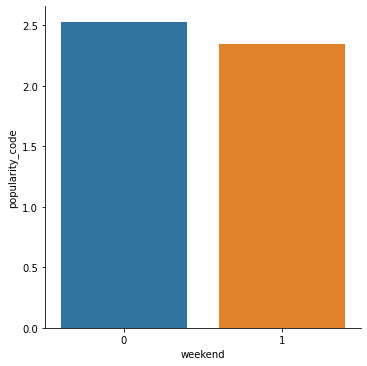

In [74]:
fig=plt.figure(figsize=(14,8))
sns.catplot(y="popularity_code",x="weekend",data=df,kind='bar',ci=None)

In [14]:
a=list()
for i in range(5):
    a.append(df.loc[df['weekend']==1]['popularity_code'].value_counts()[i+1]/df['weekend'].value_counts()[1])

In [18]:
b=list()
for i in range(5):
    b.append(df.loc[df['weekend']==0]['popularity_code'].value_counts()[i+1]/df['weekend'].value_counts()[0])

In [54]:
proba=pd.DataFrame({"popularity":df['popularity'].value_counts().keys(),"probability":a,"Weekend":[1]*5})
probb=pd.DataFrame({"popularity":df['popularity'].value_counts().keys(),"probability":b,"Weekend":[0]*5})

In [29]:
prob=pd.concat([proba,probb])
prob

,popularity,probability,Weekend
0,very low,0.292559,1
1,low,0.279704,1
2,average,0.233346,1
3,high,0.176081,1
4,very high,0.018309,1
0,very low,0.255797,0
1,low,0.248447,0
2,average,0.239441,0
3,high,0.222981,0
4,very high,0.033333,0


<AxesSubplot:xlabel='popularity', ylabel='probability'>

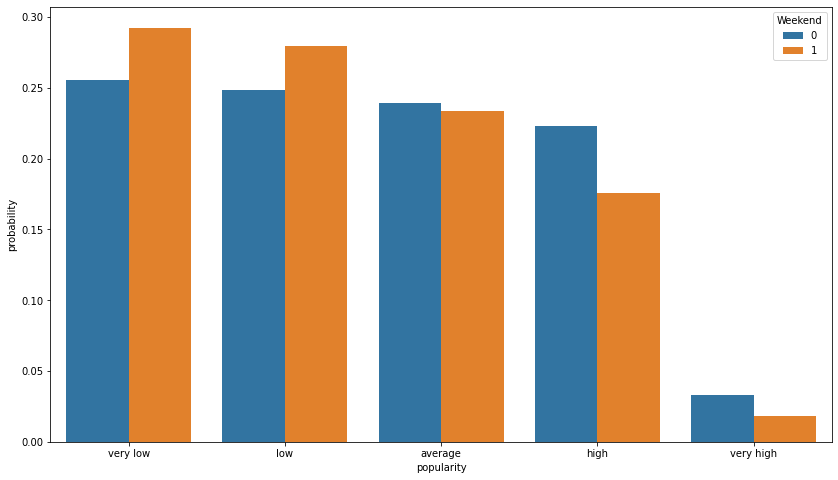

In [41]:
fig=plt.figure(figsize=(14,8))
sns.barplot(y="probability",x="popularity",data=prob,hue="Weekend")

In [75]:
def func(row):
    day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    return day_name[row['release_date'].weekday()]
df["Day"]=df.apply(lambda row : func(row),axis=1)

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,tempo,valence,year,duration-min,popularity,explicit_coded,mode_coded,popularity_code,weekend,Day
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,...,110.838,0.03980,1947,3.0,very low,0,0,1,0,Wednesday
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,...,152.066,0.85900,2020,2.4,low,0,0,2,0,Friday
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,...,108.004,0.70900,1950,2.6,very low,0,1,1,1,Sunday
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,...,83.636,0.96400,1974,2.4,low,0,0,2,0,Tuesday
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,...,117.260,0.78500,1973,3.4,average,0,0,3,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,...,81.940,0.74400,2014,3.4,average,0,0,3,0,Tuesday
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,...,134.009,0.70100,1959,2.0,very high,0,0,5,0,Thursday
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,...,124.883,0.89000,1984,2.5,low,0,1,2,1,Sunday
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,...,73.234,0.00558,2017,3.1,high,0,0,4,0,Friday


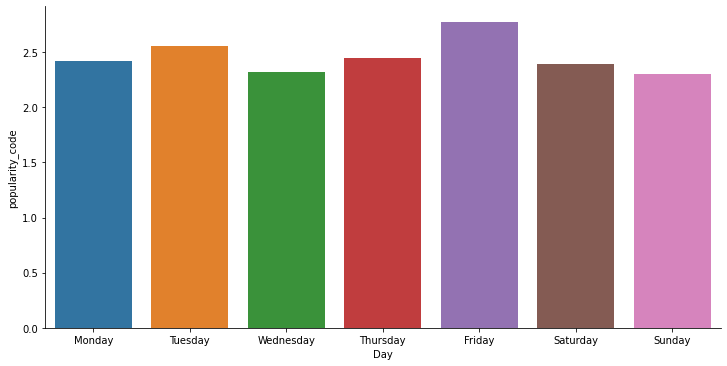

In [88]:

sns.catplot(x='Day',y='popularity_code',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],kind='bar',data=df,aspect=2,ci=None)

In [89]:
# Number of days b/w release date and 01/01/2022
from datetime import datetime
ref_date=datetime(2022,1,1)
def days(row):
    delta=ref_date-row['release_date']
    return delta.days
df["Num_days"]=df.apply(lambda row : days(row),axis=1)
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,valence,year,duration-min,popularity,explicit_coded,mode_coded,popularity_code,weekend,Day,Num_days
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,...,0.03980,1947,3.0,very low,0,0,1,0,Wednesday,27394
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,...,0.85900,2020,2.4,low,0,0,2,0,Friday,414
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,...,0.70900,1950,2.6,very low,0,1,1,1,Sunday,26298
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,...,0.96400,1974,2.4,low,0,0,2,0,Tuesday,17413
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,...,0.78500,1973,3.4,average,0,0,3,0,Monday,17897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,...,0.74400,2014,3.4,average,0,0,3,0,Tuesday,2916
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,...,0.70100,1959,2.0,very high,0,0,5,0,Thursday,23011
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,...,0.89000,1984,2.5,low,0,1,2,1,Sunday,13880
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,...,0.00558,2017,3.1,high,0,0,4,0,Friday,1583


In [121]:
columns=list()
for i in df.columns:
    filt=i=='id' or i=='explicit' or i=='mode' or i=='release_date' or i=='popularity' or i=='weekend' or i=='Day'or i=='Num_days'
    if not filt:
        columns.append(i)
covar=df.loc[:,columns].cov() # covarience data frame

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,explicit_coded,mode_coded,popularity_code
acousticness,0.134610,-0.017995,-0.071799,0.029116,-0.022426,-0.001605,-1.166948,-0.001599,-2.268613,-0.016091,-5.338111,-0.064933,-0.025817,-0.010108,-0.176114
danceability,-0.017995,0.030756,0.009520,-0.013348,0.018062,-0.003812,0.280814,0.006038,-0.113384,0.022145,0.960669,-0.042120,0.013681,0.005272,0.045510
energy,-0.071799,0.009520,0.068897,-0.017153,0.030195,0.006076,1.128811,-0.003175,1.839287,0.022673,3.304834,0.030768,0.010213,0.007013,0.101058
instrumentalness,0.029116,-0.013348,-0.017153,0.088777,-0.018950,-0.000998,-0.619964,-0.005194,-0.796319,-0.015109,-1.535423,0.061167,-0.013479,0.006392,-0.111227
key,-0.022426,0.018062,0.030195,-0.018950,12.439404,-0.005620,0.501562,0.009279,1.861410,0.028034,1.275487,-0.066050,0.011282,0.232173,0.059213
liveness,-0.001605,-0.003812,0.006076,-0.000998,-0.005620,0.030272,0.044986,0.003065,0.076327,0.000053,-0.207977,0.012006,0.001216,-0.000743,-0.021109
loudness,-1.166948,0.280814,1.128811,-0.619964,0.501562,0.044986,30.325817,-0.130301,32.961799,0.392220,71.519045,0.156438,0.304943,0.086947,2.677439
speechiness,-0.001599,0.006038,-0.003175,-0.005194,0.009279,0.003065,-0.130301,0.024303,-0.037564,0.001700,-0.629639,-0.033088,0.016374,0.002650,-0.022491
tempo,-2.268613,-0.113384,1.839287,-0.796319,1.861410,0.076327,32.961799,-0.037564,912.043855,1.054737,92.653503,-1.479322,0.315955,-0.095735,2.727233
valence,-0.016091,0.022145,0.022673,-0.015109,0.028034,0.000053,0.392220,0.001700,1.054737,0.066670,-0.611645,-0.091622,-0.004417,-0.001090,-0.001619


<AxesSubplot:>

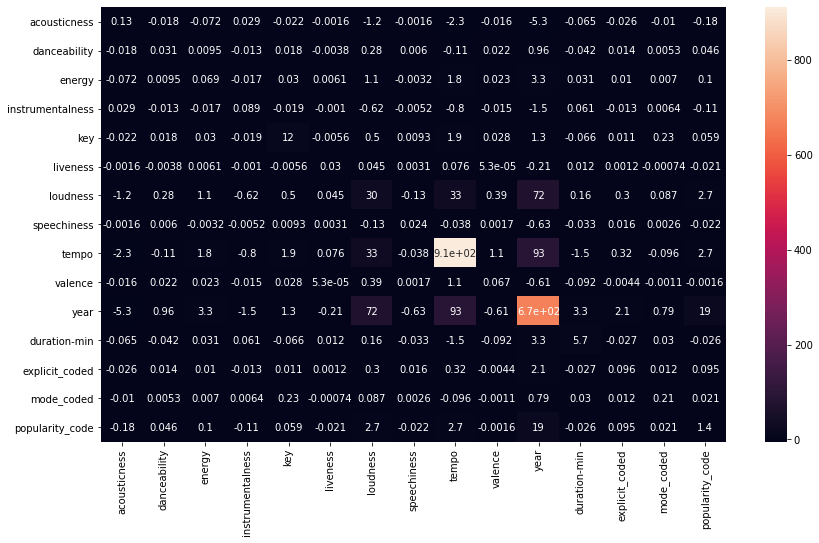

In [126]:
fig=plt.figure(figsize=(14,8))
sns.heatmap(covar,annot=True)

<AxesSubplot:>

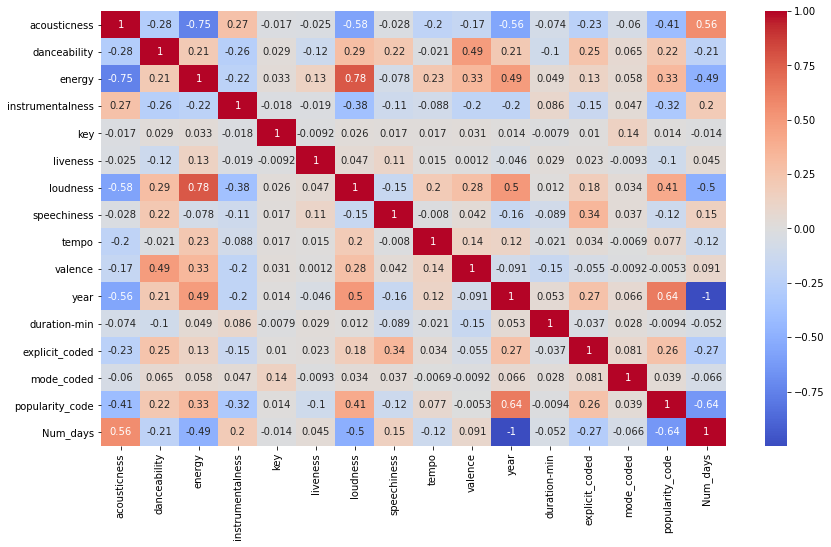

In [129]:
columns=columns[:-1]
correl=df.loc[:,columns].corr() #correlation
fig=plt.figure(figsize=(14,8))
sns.heatmap(correl,cmap='coolwarm',annot=True)

In [152]:
#p-value calculation
x=sm.OLS(df['popularity_code'],df.loc[:,columns]).fit()
p=x.pvalues

In [155]:
p_values=pd.DataFrame({'Features': p.keys(),'p_vals':p.values}) #data frame

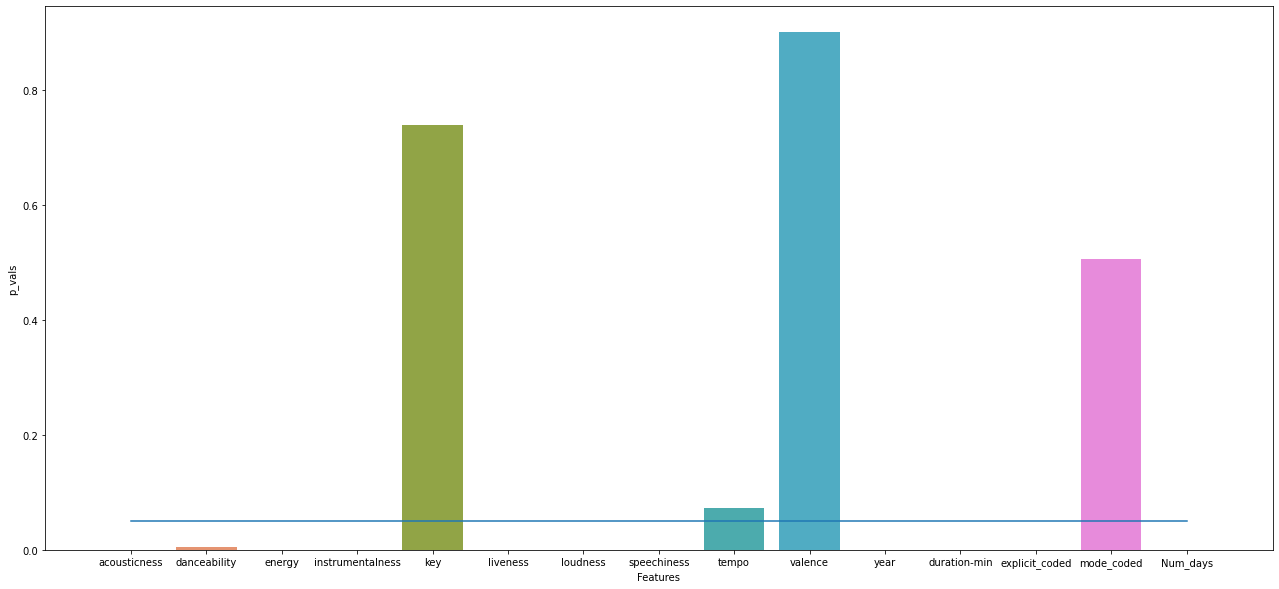

In [168]:
fig=plt.figure(figsize=(22,10))
sns.barplot(y='p_vals',x='Features',data=p_values)
plt.plot(np.arange(0,15,1),np.ones(15)*0.05)

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])